https://developers.google.com/machine-learning/recommendation

https://keras.io/examples/structured_data/collaborative_filtering_movielens/

https://medium.com/@jdwittenauer/deep-learning-with-keras-recommender-systems-e7b99cb29929

# Section 4 프로젝트 : 추천 시스템 (Recommender System)
<br/>

### 선정 이유
- 아직 도메인을 정하진 못했지만, 꼭 한번 배워보고 싶었던 분야 (텍스트, 이미지 등의 주제는 크게 와닿지 않았음)
- 인스타 그램 피드의 광고부터 유튜브, 넷플릭스, 쇼핑몰 등 안 쓰이는 곳이 없는 알고리즘

<br/>

### 프로젝트 개요
- 프로젝트 기간 중 반 이상을 논문 리뷰, 유튜브 강의 시청 등 이론 공부에 써버려 고도화된 기술을 구현해 볼 시간이 부족
- 부트캠프 섹션 중에 없던 내용이기 때문에, 추천 알고리즘에 대해 공부한 내용을 소개하는 방향으로 진행
- 간단한 기초 수준의 모델을 직접 구현



# 추천 시스템이란? 
- 각각의 개별 사용자에 맞게 다음 행동을 추천해주는 시스템
- 유튜브 알고리즘, 넷플릭스 영화 추천, 쇼핑몰의 추천 상품 등


# 추천 시스템의 종류
### 기본 (기존의) 추천 시스템
- **Collaborative Filtering (협력 필터링)**
  - **User-based Collaborative Filtering**
  - **Item-based Collaborative Filtering**
<br/>   

- **Content-based Filtering (컨텐츠 기반 필터링)**


### User-based Collaborative Filtering
- 같은 영화들을 본 개수를 바탕으로 서로 비슷한 사용자를 찾는 방식
    user_1과 user_3이 같은 영화들을 많이 봤다면, 비슷한 사용자로 판단.
    
    
- user_1과 user_3이 비슷한 성향을 보이므로, 서로 보지 않은 영화를 추천 가능
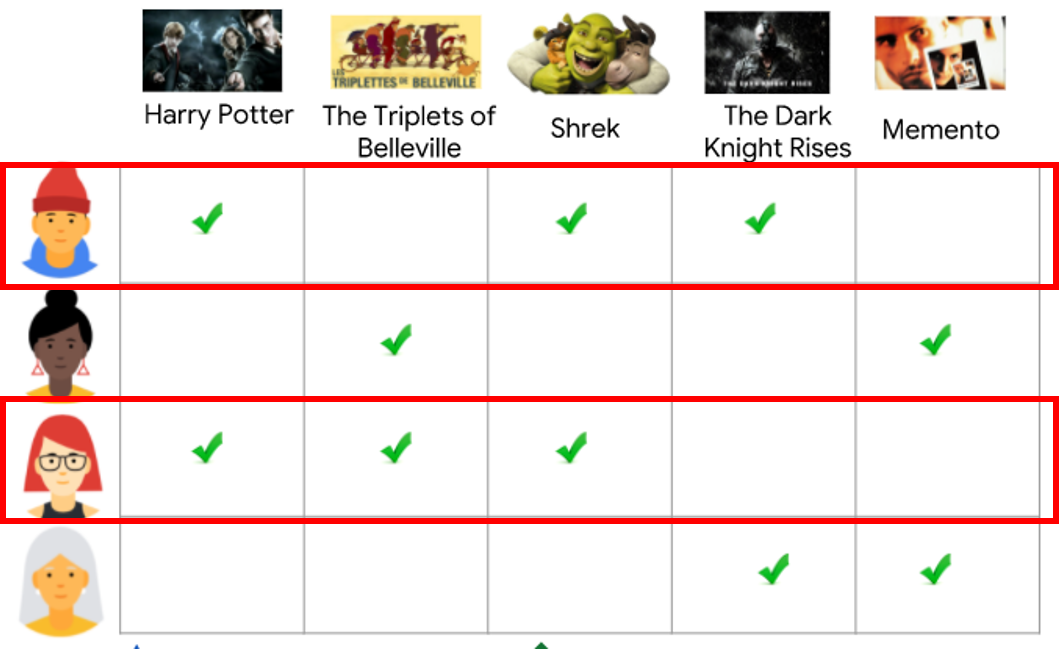



### Item-based Collaborative Filtering
- 같은 영화를 본 사용자를 바탕으로 서로 비슷한 영화를 찾는 방식  
    해리포터와 슈렉을 동시에 시청한 사용자가 많다면, 비슷한 영화로 판단
    
    
- 해리포터를 본 사람에게 슈렉을 추천 
    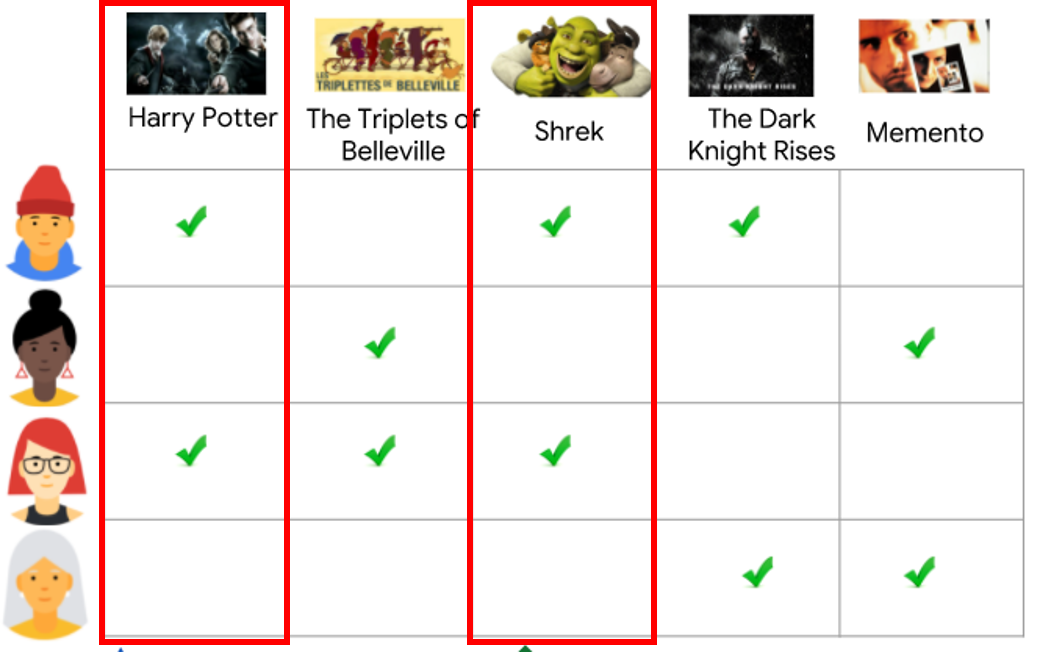

### Content-based Filtering
- 영화의 특성들을 비교하여 비슷한 영화를 찾는 방식  

  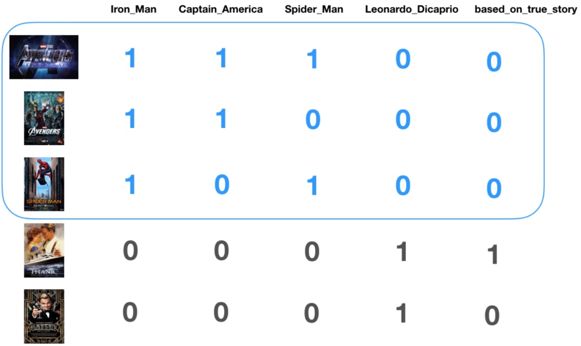

### Collaborative vs Content-based
- **Collaborative Filtering의 단점**
    - 사용자의 데이터가 적은 경우, 사용자의 취향을 제대로 파악하지 못 할 수 있음
    - Cold Start 문제 : 새로 개봉한 영화(아무도 본 사람이 없을 때) 추천 불가능
    
    
- **Content-based Filtering의 단점**
    - 사용자 맞춤형 추천이 불가.
    
### Hybrid Filtering
- **두 가지 방식을 결합해서 사용.**
    - 보통은 Collaborative 방식을 사용
    - 새로 나온 영화 혹은 데이터가 충분치 못한 사용자에 대해서는 Content-based 방식 사용

# 추천 시스템을 구현하는 방식
- **Matrix Factorization**
- **Deep Neural Networks**

### Matrix Factorization 
- 유저 정보를 임베딩한 행렬과 아이템 정보를 임베딩한 행렬을 단순히 내적 (dot product)

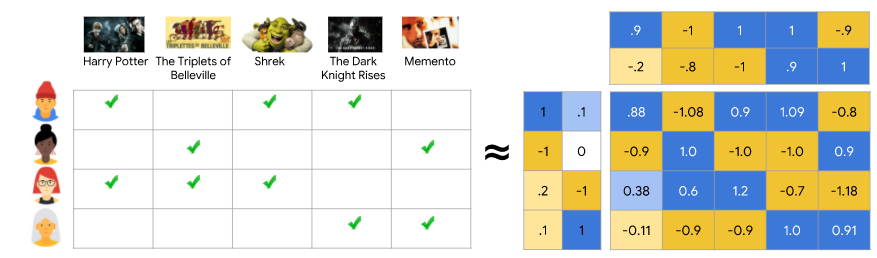

### Deep Neural Networks
- 벡터로 임베딩하여 신경망의 layer 형태로 구축, 연산

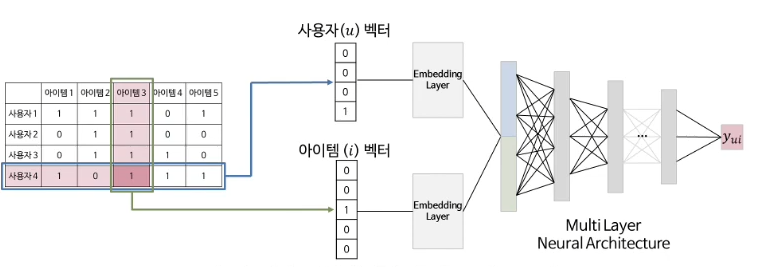

### MF vs DNN
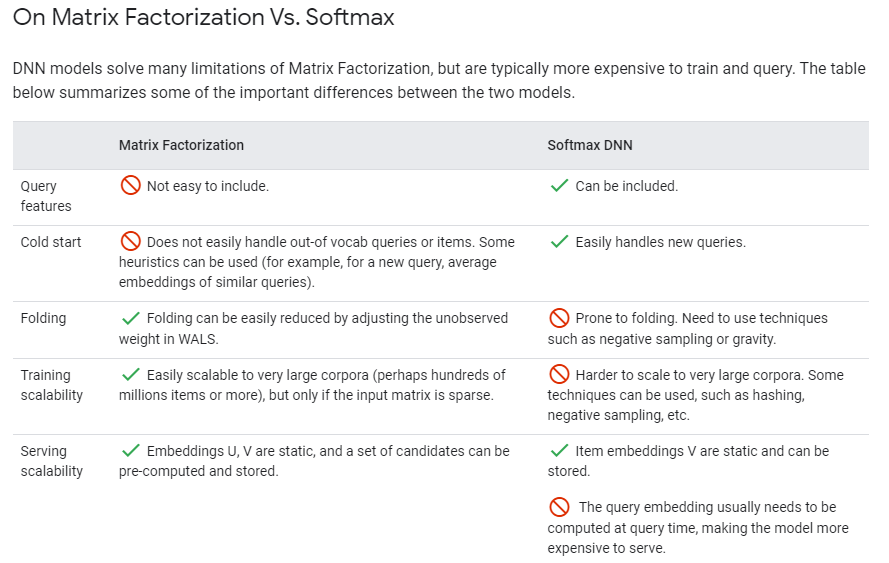

# 기타 내용
## 추천 시스템의 평가 지표
- **정확도 평가**
    - MAE, RMSE : 가장 기본적인 지표, 타겟값이 연속형 데이터인 경우 (ex - 영화 평점)
    - Correlation : 예측값과 실측값의 상관계수, 변화 경향을 측정 (Pearson correlation coefficient)
    - NDCG (normalized Discounted Cumulative Gain) : 랭킹 기반 추천 시스템 (관련성이 높은 결과를 상위에 노출시켰는지)
- **사용자 만족도 평가**
    - CTR(Click through ratio) : 클릭율
    - Duration Time (체류 시간), Retention Rate (재방문율)
    
## Match & Rank
- Match : 학습 후, 예측을 하는 부분
- Rank : 예측 후, 사용자에게 노출시키는 부분

## 추천 시스템의 작동 순서
- 영화 추천 예시
    - 사용자의 기존 데이터에서 어떤 영화에 어떤 평점을 주었는 지 학습 (다른 사용자들의 데이터와 함께)
    - 특정 영화에 어떤 평점을 줄 지 예측
    - 모든 영화에 대해 예측한 후, 예측 평점이 가장 높은 영화를 추천

# 기본 모델 실습
- Movielens "ml-latest-small" 데이터
  https://grouplens.org/datasets/movielens/
- Basic collaborative filtering 
- Dot product & DNN model

In [ ]:
import numpy as np
import pandas as pd
import os
import warnings

from zipfile import ZipFile
from urllib.request import urlretrieve

In [ ]:
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model

from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
urlretrieve("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip", "movielens.zip")
ZipFile("movielens.zip", "r").extractall()

## 데이터의 구조
- rating : 유저가 평가를 매긴 정보
- movies : 영화 정보
- links : imdb & tmdb 에서의 movie_id
- tags : 유저가 영화에 남긴 평

In [ ]:
# header = ['user_id','item_id','rating','timestamp']
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
links = pd.read_csv('ml-latest-small/links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
tags = pd.read_csv('ml-latest-small/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [ ]:
g = ratings.groupby('userId')['rating'].count()
top_users = g.sort_values(ascending=False)[:15]
g = ratings.groupby('movieId')['rating'].count()
top_movies = g.sort_values(ascending=False)[:15]
top_r = ratings.join(top_users, rsuffix='_r', how='inner', on='userId')
top_r = top_r.join(top_movies, rsuffix='_r', how='inner', on='movieId')
pd.crosstab(top_r.userId, top_r.movieId, top_r.rating, aggfunc=np.sum)

movieId,1,50,110,260,296,318,356,480,527,589,593,1196,2571,2858,2959
userId,,,,,,,,,,,,,,,
68,2.5,3.0,2.5,5.0,2.0,3.0,3.5,3.5,4.0,3.5,3.5,5.0,4.5,5.0,2.5
182,4.0,4.5,3.5,3.5,5.0,4.5,5.0,3.5,4.0,2.0,4.5,3.0,5.0,5.0,5.0
249,4.0,4.0,5.0,5.0,4.0,4.5,4.5,4.0,4.5,4.0,4.0,5.0,5.0,4.5,5.0
274,4.0,4.0,4.5,3.0,5.0,4.5,4.5,3.5,4.0,4.5,4.0,4.5,4.0,5.0,5.0
288,4.5,NaN,5.0,5.0,5.0,5.0,5.0,2.0,5.0,4.0,5.0,4.5,3.0,NaN,3.5
307,4.0,4.5,3.5,3.5,4.5,4.5,4.0,3.5,4.5,2.5,4.5,3.0,3.5,4.0,4.0
380,5.0,4.0,4.0,5.0,5.0,3.0,5.0,5.0,NaN,5.0,5.0,5.0,4.5,NaN,4.0
387,NaN,4.5,3.5,4.5,5.0,3.5,4.0,3.0,NaN,3.5,4.0,4.5,4.0,4.5,4.5
414,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0


## 데이터 전처리
- LabelEncoder : 순서 재정렬
- user & movie_id 를 array로, X값
- rating을 y값으로
- 벡터의 길이는 임의로 설정
- 임베딩 : 정규분포의 형태로 임베딩

In [ ]:
user_enc = LabelEncoder()
ratings['user'] = user_enc.fit_transform(ratings['userId'].values)
n_users = ratings['user'].nunique()
item_enc = LabelEncoder()
ratings['movie'] = item_enc.fit_transform(ratings['movieId'].values)
n_movies = ratings['movie'].nunique()
ratings['rating'] = ratings['rating'].values.astype(np.float32)
min_rating = min(ratings['rating'])
max_rating = max(ratings['rating'])
n_users, n_movies, min_rating, max_rating

(610, 9724, 0.5, 5.0)

In [ ]:
X = ratings[['user', 'movie']].values
y = ratings['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90752, 2), (10084, 2), (90752,), (10084,))

In [ ]:
X_train

array([[  90, 1829],
       [ 291,   98],
       [ 473, 1321],
       ...,
       [ 479, 4601],
       [   5,  748],
       [ 102, 4522]], dtype=int64)

In [ ]:
X_train[:,0]

array([ 90, 291, 473, ..., 479,   5, 102], dtype=int64)

In [ ]:
n_factors = 500
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [ ]:
from keras.models import Model
from keras.layers import Input, Reshape, Dot
from keras.layers.embeddings import Embedding
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2


In [ ]:
from keras.layers import Add, Activation, Lambda
class EmbeddingLayer:
    def __init__(self, n_items, n_factors):
        self.n_items = n_items
        self.n_factors = n_factors
    
    def __call__(self, x):
        x = Embedding(self.n_items, self.n_factors, embeddings_initializer='he_normal',
                      embeddings_regularizer=l2(1e-6))(x)
        x = Reshape((self.n_factors,))(x)
        return x

## Dot 모델 

In [ ]:
def Recommender_Dot(n_users, n_movies, n_factors, min_rating, max_rating):
    user = Input(shape=(1,))
    u = EmbeddingLayer(n_users, n_factors)(user)
    ub = EmbeddingLayer(n_users, 1)(user)
    
    movie = Input(shape=(1,))
    m = EmbeddingLayer(n_movies, n_factors)(movie)
    mb = EmbeddingLayer(n_movies, 1)(movie)
    x = Dot(axes=1)([u, m])
    x = Add()([x, ub, mb])
    x = Activation('sigmoid')(x)
    x = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(x)
    model = Model(inputs=[user, movie], outputs=x)
    opt = Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

In [ ]:
model_dot = Recommender_Dot(n_users, n_movies, n_factors, min_rating, max_rating)
model_dot.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 500)       305000      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 500)       4862000     input_2[0][0]                    
______________________________________________________________________________________________

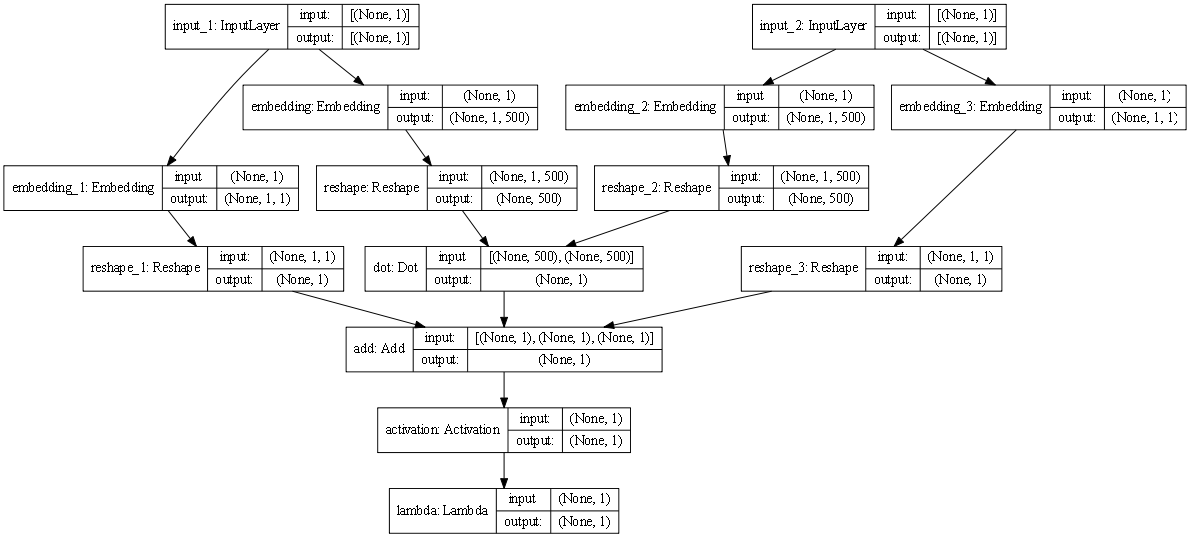

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_dot, to_file='./dot_model.png', show_shapes=True, show_layer_names=True, dpi=70)

In [ ]:
history = model_dot.fit(x=X_train_array, y=y_train, batch_size=64, epochs=5,
                    verbose=1, validation_data=(X_test_array, y_test))

Epoch 1/5
1418/1418 [==============================] - 8s 5ms/step - loss: 1.1012 - val_loss: 0.7883
Epoch 2/5
1418/1418 [==============================] - 7s 5ms/step - loss: 0.4083 - val_loss: 0.7526
Epoch 3/5
1418/1418 [==============================] - 7s 5ms/step - loss: 0.1664 - val_loss: 0.7632
Epoch 4/5
1418/1418 [==============================] - 7s 5ms/step - loss: 0.1083 - val_loss: 0.7698
Epoch 5/5
1418/1418 [==============================] - 7s 5ms/step - loss: 0.1016 - val_loss: 0.7729


## DNN 모델

In [ ]:
from keras.layers import Concatenate, Dense, Dropout
def Recommender_DNN(n_users, n_movies, n_factors, min_rating, max_rating):
    user = Input(shape=(1,))
    u = EmbeddingLayer(n_users, n_factors)(user)
    
    movie = Input(shape=(1,))
    m = EmbeddingLayer(n_movies, n_factors)(movie)
    
    x = Concatenate()([u, m])
    x = Dropout(0.05)(x)
    
    x = Dense(128, kernel_initializer='he_normal')(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    
    x = Dense(1, kernel_initializer='he_normal')(x)
    x = Activation('sigmoid')(x)
    x = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(x)
    model = Model(inputs=[user, movie], outputs=x)
    opt = Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

In [ ]:
model_DNN = Recommender_DNN(n_users, n_movies, n_factors, min_rating, max_rating)
model_DNN.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 1, 500)       305000      input_3[0][0]                    
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 1, 500)       4862000     input_4[0][0]                    
____________________________________________________________________________________________

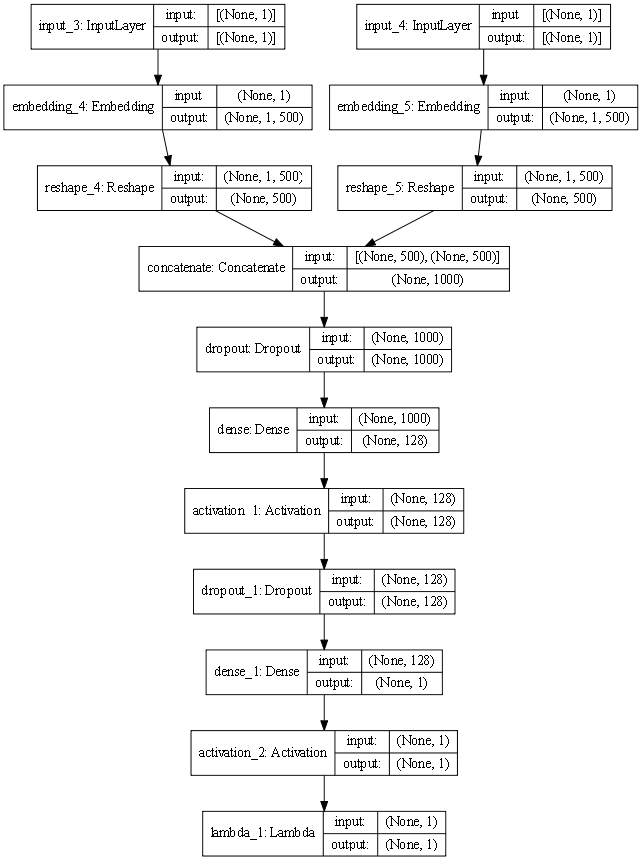

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_DNN, to_file='./DNN_model.png', show_shapes=True, show_layer_names=True, dpi=70)

In [ ]:
history = model_DNN.fit(x=X_train_array, y=y_train, batch_size=64, epochs=5,
                    verbose=1, validation_data=(X_test_array, y_test))

Epoch 1/5
1418/1418 [==============================] - 8s 5ms/step - loss: 0.8277 - val_loss: 0.7996
Epoch 2/5
1418/1418 [==============================] - 8s 5ms/step - loss: 0.7068 - val_loss: 0.7681
Epoch 3/5
1418/1418 [==============================] - 8s 5ms/step - loss: 0.6602 - val_loss: 0.7753
Epoch 4/5
1418/1418 [==============================] - 8s 5ms/step - loss: 0.6267 - val_loss: 0.7859
Epoch 5/5
1418/1418 [==============================] - 7s 5ms/step - loss: 0.5940 - val_loss: 0.7907


In [ ]:
predictions = model_DNN.predict(X_test_array)
[print(predictions[i], y_test[i]) for i in range(0,10)]

[2.9720273] 4.5
[3.3602676] 3.0
[2.5129561] 3.0
[3.6389709] 4.0
[3.7090993] 4.0
[3.3927512] 4.0
[3.9866104] 3.5
[3.5570765] 4.5
[2.11687] 0.5
[4.119441] 3.5


[None, None, None, None, None, None, None, None, None, None]

## Prediction

In [ ]:
X_test_array[0:]

[array([431, 287, 598, ..., 115, 110, 478], dtype=int64),
 array([7316,  412, 3217, ..., 5721, 3650,  309], dtype=int64)]

In [ ]:
X_test_array[0]

array([431, 287, 598, ..., 115, 110, 478], dtype=int64)

In [ ]:
user_ids = ratings["userId"].unique().tolist()
movie_ids = ratings["movieId"].unique().tolist()

user_id = ratings.userId.sample(1).iloc[0]

movies_watched_by_user = ratings[ratings.userId == user_id]
movies_not_watched = movies[
    ~movies["movieId"].isin(movies_watched_by_user.movieId.values)
]["movieId"]

In [ ]:
user_id

310

In [ ]:
movies_not_watched = [[i] for i in movies_not_watched]

In [ ]:
movies_not_watched[0][0]

1

In [ ]:
user_movie_array = np.hstack(
    ([[user_id]] * len(movies_not_watched), movies_not_watched)
)

In [ ]:
user_movie_array

array([[   310,      1],
       [   310,      2],
       [   310,      3],
       ...,
       [   310, 193585],
       [   310, 193587],
       [   310, 193609]], dtype=int64)

In [ ]:
arr = [user_movie_array[:, 0], user_movie_array[:, 1]]
# arr = np.array([user_id] * len(movies_not_watched), movies_not_watched)
# X_train_array = [X_train[:, 0], X_train[:, 1]]

In [ ]:
arr

[array([310, 310, 310, ..., 310, 310, 310], dtype=int64),
 array([     1,      2,      3, ..., 193585, 193587, 193609], dtype=int64)]

In [ ]:
pred = model_DNN.predict(arr)

https://github.com/tensorflow/tensorflow/issues/23698

In [ ]:
pred

array([[2.4402816 ],
       [1.8461993 ],
       [0.79734373],
       ...,
       [1.940267  ],
       [1.940267  ],
       [1.940267  ]], dtype=float32)

In [ ]:
np.sort(pred, axis=0)[::-1]

array([[3.9014661 ],
       [3.894048  ],
       [3.8717024 ],
       ...,
       [0.6125733 ],
       [0.57958055],
       [0.57461387]], dtype=float32)

In [ ]:
pred_flat = pred.flatten()

In [ ]:
top_ratings = pred_flat.argsort()[-10:][::-1]

In [ ]:
recommended_ids = [movies_not_watched[x][0] for x in top_ratings]
recommended_ids

[4020, 2408, 2501, 5938, 5156, 913, 6427, 474, 840, 2497]

In [ ]:
recommended_movies = movies[movies["movieId"].isin(recommended_ids)]

In [ ]:
recommended_movies

,movieId,title,genres
412,474,In the Line of Fire (1993),Action|Thriller
652,840,House Arrest (1996),Children|Comedy
695,913,"Maltese Falcon, The (1941)",Film-Noir|Mystery
1808,2408,Cocoon: The Return (1988),Comedy|Sci-Fi
1879,2497,Message in a Bottle (1999),Romance
1882,2501,October Sky (1999),Drama
3004,4020,"Gift, The (2000)",Thriller
3726,5156,"Big Doll House, The (1971)",Action
4128,5938,Deathtrap (1982),Comedy|Crime|Mystery|Thriller
4383,6427,"Railway Children, The (1970)",Children|Drama


In [ ]:

def recommend_for_user(user_id):
  movies_watched_by_user = ratings[ratings.userId == user_id]
  movies_not_watched = movies[~movies["movieId"].isin(movies_watched_by_user.movieId.values)]["movieId"]
  movies_not_watched = [[i] for i in movies_not_watched]
  user_movie_array = np.hstack(([[user_id]] * len(movies_not_watched), movies_not_watched))
  arr = [user_movie_array[:, 0], user_movie_array[:, 1]]
  prediction = model_DNN.predict(arr).flatten()
  top_ratings = prediction.argsort()[-10:][::-1]
  recommended_ids = [movies_not_watched[x][0] for x in top_ratings]
  recommended_movies = movies[movies["movieId"].isin(recommended_ids)]
  return recommended_movies  


## 직접 유저 정보 만들어서 예측해보기

In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
movies[movies['title'].str.contains('Sixth Sense')]

,movieId,title,genres
2078,2762,"Sixth Sense, The (1999)",Drama|Horror|Mystery


In [ ]:
movies[movies['title'].str.contains('Sixth Sense')].index.tolist()[0]

2078

In [ ]:
movies[movies['title'].str.contains('Identity')]

,movieId,title,genres
3854,5418,"Bourne Identity, The (2002)",Action|Mystery|Thriller
4327,6323,Identity (2003),Crime|Horror|Mystery|Thriller
5539,26614,"Bourne Identity, The (1988)",Action|Adventure|Drama|Mystery|Thriller
8100,100390,Identity Thief (2013),Comedy|Crime


In [ ]:
movies[movies['title'].str.contains('Shutter')]

,movieId,title,genres
7258,74458,Shutter Island (2010),Drama|Mystery|Thriller


In [ ]:
movies[movies['title'].str.contains('Prestige')]

,movieId,title,genres
6331,48780,"Prestige, The (2006)",Drama|Mystery|Sci-Fi|Thriller


In [ ]:
movies[movies['title'].str.contains('Swan')]

,movieId,title,genres
272,313,"Swan Princess, The (1994)",Animation|Children
7456,81591,Black Swan (2010),Drama|Thriller


In [ ]:
movies[movies['title'].str.contains('Mission')]

,movieId,title,genres
546,648,Mission: Impossible (1996),Action|Adventure|Mystery|Thriller
2066,2745,"Mission, The (1986)",Drama
2507,3354,Mission to Mars (2000),Sci-Fi
2700,3623,Mission: Impossible II (2000),Action|Adventure|Thriller
5180,8387,Police Academy: Mission to Moscow (1994),Comedy|Crime
5636,27368,Asterix & Obelix: Mission Cleopatra (Astérix &...,Adventure|Comedy|Fantasy
6199,45186,Mission: Impossible III (2006),Action|Adventure|Thriller
7774,91630,Mission: Impossible - Ghost Protocol (2011),Action|Adventure|Thriller|IMAX
8439,111781,Mission: Impossible - Rogue Nation (2015),Action|Adventure|Thriller
9720,189333,Mission: Impossible - Fallout (2018),Action|Adventure|Thriller


In [ ]:
Sixth_Sense = movies[movies['title'].str.contains('Sixth Sense')].index.tolist()[0]
Identity = movies[movies['title'].str.contains('Identity')].index.tolist()[1]
Shutter = movies[movies['title'].str.contains('Shutter')].index.tolist()[0]
Prestige = movies[movies['title'].str.contains('Prestige')].index.tolist()[0]
Black_Swan = movies[movies['title'].str.contains('Swan')].index.tolist()[1]

Bourne1 = movies[movies['title'].str.contains('Identity')].index.tolist()[0]
Bourne2 = movies[movies['title'].str.contains('Identity')].index.tolist()[2]
Mission1 = movies[movies['title'].str.contains('Mission')].index.tolist()[0]
Mission2 = movies[movies['title'].str.contains('Mission')].index.tolist()[3]
Mission3 = movies[movies['title'].str.contains('Mission')].index.tolist()[6]
Mission4 = movies[movies['title'].str.contains('Mission')].index.tolist()[7]
Mission5 = movies[movies['title'].str.contains('Mission')].index.tolist()[8]

my_movie_list = [Sixth_Sense, Identity, Shutter, Prestige, Black_Swan, Bourne1, Bourne2, Mission1, Mission2, Mission3, Mission4, Mission5]
my_rating_list = [5, 4, 4, 5, 3, 4, 4, 4, 5, 5, 3, 3]


In [ ]:
new_user = pd.DataFrame({
    'userId' : 9999,
    'movieId' : my_movie_list,
    'rating' : my_rating_list
})

new_user

,userId,movieId,rating
0,9999,2078,5
1,9999,4327,4
2,9999,7258,4
3,9999,6331,5
4,9999,7456,3
5,9999,3854,4
6,9999,5539,4
7,9999,546,4
8,9999,2700,5
9,9999,6199,5


In [ ]:
ratings2 = ratings.append(new_user, ignore_index=True)

In [ ]:
ratings2[ratings2.userId == 9999]

,userId,movieId,rating,timestamp,user,movie
100836,9999,2078,5.0,NaN,NaN,NaN
100837,9999,4327,4.0,NaN,NaN,NaN
100838,9999,7258,4.0,NaN,NaN,NaN
100839,9999,6331,5.0,NaN,NaN,NaN
100840,9999,7456,3.0,NaN,NaN,NaN
100841,9999,3854,4.0,NaN,NaN,NaN
100842,9999,5539,4.0,NaN,NaN,NaN
100843,9999,546,4.0,NaN,NaN,NaN
100844,9999,2700,5.0,NaN,NaN,NaN
100845,9999,6199,5.0,NaN,NaN,NaN


In [ ]:
def recommend_for_user2(user_id):
  movies_watched_by_user = ratings2[ratings2.userId == user_id]
  movies_not_watched = movies[~movies["movieId"].isin(movies_watched_by_user.movieId.values)]["movieId"]
  movies_not_watched = [[i] for i in movies_not_watched]
  user_movie_array = np.hstack(([[user_id]] * len(movies_not_watched), movies_not_watched))
  arr = [user_movie_array[:, 0], user_movie_array[:, 1]]
  prediction = model_DNN.predict(arr).flatten()
  top_ratings = prediction.argsort()[-10:][::-1]
  recommended_ids = [movies_not_watched[x][0] for x in top_ratings]
  recommended_movies = movies[movies["movieId"].isin(recommended_ids)]
  return recommended_movies  

In [ ]:
recommend_for_user2(9999)

,movieId,title,genres
591,731,Heaven's Prisoners (1996),Crime|Thriller
652,840,House Arrest (1996),Children|Comedy
1252,1663,Stripes (1981),Comedy|War
1945,2579,Following (1998),Crime|Mystery|Thriller
1955,2593,"Monster, The (Mostro, Il) (1994)",Comedy
3248,4390,Rape Me (Baise-moi) (2000),Crime|Drama|Thriller
3642,5004,"Party, The (1968)",Comedy
4843,7235,Ichi the Killer (Koroshiya 1) (2001),Action|Comedy|Crime|Drama|Horror|Thriller
5035,7840,Gunga Din (1939),Adventure|Comedy|War
5091,8025,The Thief (1997),Drama


## 결과 비교
- 직접 만든 유저의 추천 항목에 범죄 & 스릴러 종류가 많이 포함
- 여러번 실험한 결과, 같은 영화들이 계속 등장 & 최신 영화가 잘 추천되지 않음
    - 오래된 영화들에 대한 평점이 많고, 데이터셋 내의 유저들의 평가 데이터가 너무 많아서 생기는 문제라고 추측

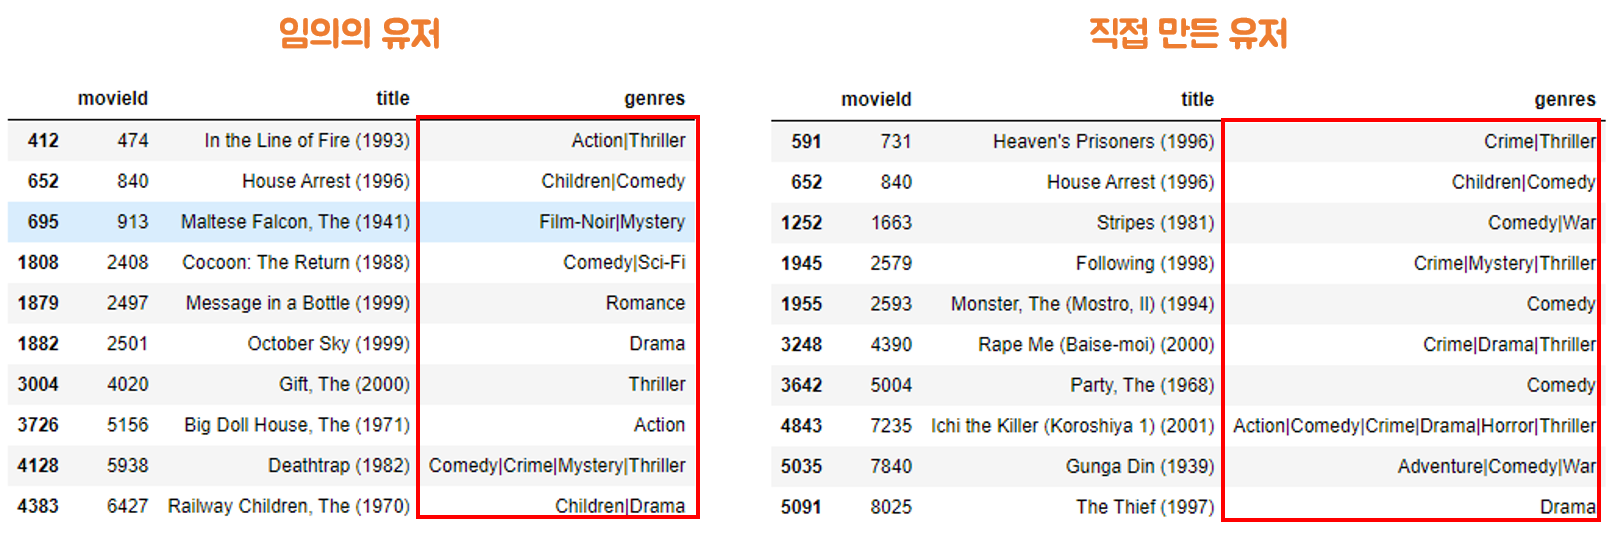

In [ ]:
ratings['userId'].value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: userId, Length: 610, dtype: int64

In [ ]:
ratings['userId'].value_counts().mean()

165.30491803278687